# Lower threshold? Gloomy financial future?
## An illustration of operator positions in four first tier cities in China.

- Group Member: He Weiyuan, Chen Dantong, Cai Yanhuan, Zhang Chuhan

Xiao Zhang, a current student in communication and new media program, was looking for a job as an operator. Being rejected by five companies, she was a little bit disappointed. “I don’t what I should do to get an offer.”She told us, “The operator position decrease in these two years, students like me are anxious” In fact, Xiao Zhang was not the only one student that face this circumstance. Xiao He, who resigned her job to study in a master program, found it much more difficult to find a job that she resigned before. Operator, the first choice of many liberal art graduates who want to get into the Internet industry, is quite hot now. Why so many students choose it? And what kind of the staff the company really want?

Frustrated but not losing faith, Xiao Zhang and Xiao He decided to conduct a study to further understand current situation of operator positions. Hearing their plan fron Wechat, their fellows, Xiao Chen and Xiao Cai, who also want to be a operator after graduation, determined to join them in completing this study.

### Background

Nowadays, data has become increasingly important in many fields. For many enterprises, using big data to better optimize their business had been the icing on the cake. Besides, with development of big data technologies, enterprises start to use data system to satisfy their goal to accurately target consumer as well as to provide preferable user experience and better products and service. Thus, data-related positions whose responsibility is systematically and efficiently processing data are extremely in need. If we take a look at a quite common position in recent years, operators, a trend will be found in this area. The number of operator positions which require job candidates to be equipped with data analyzing and processing skills is continuously climbing up. A well-known venture capitalist and technology executive LI Kaifu has predicted that in the future many positions will be replaced by artificial intelligence(AI). Positions such as operators will be the first to bear the brunt. In this case, what should operators do faced with the possible risk and will there be a transition in this area? 

### Literature Review

We found several studies about the job analyst. In 2007, Zoe_Achelics used python to scrape information on data analyst in her article “互联网企业数据分析职位招聘现状分析 ——以拉勾网为例”. 
>She used various of graphs to present several analysis perspective including position demand in different cities, responsibility requirement and salary distribution, company type and salary distribution, company development stage and salary distribution, the responsibilities of data analyst, and data skills of data analyst. 

The second article we consulted was “数据分析师就业分析报告” . 
>This report gave a general description about the recruitment of the data analyst position. It concluded that most of the position distributed in the first-line city and Hangzhou. The salary of the position mainly concentrated on six thousand to twenty-six thousand yuan. Besides, the position mainly recruited young people, requiring one to three year working experience. Among the positions, those requiring more working experience also offered higher salary. 

Moreover, in the article “Kaggle调研数据揭秘如何成为一名合格的“数据科学从业者”？”.
>In this article author provided a reference for analyzing the position of data science related practitioners. The author found out the relationship between high salary and company type as well as  practitioner’s major. Besides, he also indicated the data analysis tools that data field personnel uses most. After reviewing these articles, we decided on the study of the challenge and opportunities of operators in current Chinese marketing. 



### Research Question

Through our data, we want to explore the marketing requirements for operators in China, and make a comparison of differences of operators’ requirements and required quantity among four cities. Our research questions are listed below:

- Which city will offer highest salary for operators?
- Which kind of operators will be highest in demand?
- How many years of operation working experience are in higher demand? & Is longer operation working experience related to higher salary?
- Which level of education are most required for operators? 
- Of which company types the demand for operations is highest?
- Which kind of abilities company want most?
- How many positions demand the ability of data analyzing? Is the “data” ability really related to higher salary?
- Which factors will affect the average salary most significantly?


### Data Collection

The first step of data collection was to choose target website. We found several Chinese mainstream job recruitment websites such as Lagou, BossZhipin, 51job, Zhilian. After trying out scraping data from these websites, we chose BossZhipin as our target website. There are some reasons why we chose this website: compared to 51job.com, the structure of this website is clean and tidy; there are enough data for us to analyze in BossZhipin; and their anti-scraping mechanism is not so difficult as Lagou. 
The next step here is to clarify the structure and information we need in BossZhipin. We found the information we need is concentrated on two kinds of pages: the category page and the detail page, which are shown below.


In [7]:
from IPython.display import display, HTML
from html.parser import HTMLParser
HTML('<iframe src=https://www.zhipin.com/job_detail/?query=%E8%BF%90%E8%90%A5&scity=101020100&industry=&position= width=1000 height=350></iframe>')

Category Page
This page includes:
- position
- city
- salary range
- company
- company size
- company type
- required experience
- education level
- links of detail pages

In [8]:
HTML('<iframe src=https://www.zhipin.com/job_detail/5a19223d17ef77171HV42dm_GVo~.html?ka=search_list_4 width=1000 height=350></iframe>')

Detail Page
This page includes:
- position
- city
- salary range
- company
- company size
- company type
- required experience
- education level
- responsibilities

Then, we decide on our scraping strategy. As shown in these two items, we can see that most of information included in the first page is also included in the second detail page. So our strategy of scraping can be divided to two steps. The first one is to scrape all the links of detail pages from category pages, then to scrape contents we need from the links we scraped in the former step.

Next, we can carry out data collection according to our strategy. We used beautifulsoup and xpath libraries and define seven python functions to scrape the information and store information in the format of CSV. In order to use these tools, we need to start from imports.(Note: make sure that you have installed lxml, requests and BeautifulSoup.)

In [16]:
import requests 
import re
from bs4 import BeautifulSoup
from lxml import etree  # 使用xpath语法解析
import pandas as pd
from time import sleep, time
import random
import csv

We found some regulations of links, so we define a function to create urls of category pages and use BeautifulSoup to get contents of these category pages straightforward. 

In [17]:
# create url we want to scrape
def url_create():
    headers = {
        'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:9527.0) Gecko/20100101 Firefox/9527.0"}

    city_list = ['杭州']
    position_list=['运营']
    for city in city_list:
        print("I am in {}".format(city))
        for position in position_list:
            url = "https://www.zhipin.com/job_detail/?query={}&scity=101020100&page=".format(position)
            #print(url)
            page=4
            for n in range(1,4):
                url_page = url+str(page)
                page += 1
                print(url_page)
                time_sleep = random.randrange(5, 8)
                #sleep(time_sleep*10)
                re=requests.get(url_page,headers=headers)
                re.encoding = 'utf-8'
                soup = BeautifulSoup(re.text,'html.parser')
                detail_url(soup)
            print("{} link is done".format(city))

After that, we scrape the links of detail pages from contents of category pages and aggregate all the information into one list.

In [ ]:
def detail_url(data):
    for item in data.find_all('div','job-primary'):
        for info_primary in item.find_all('div','info-primary'): 
            for link in info_primary.find_all('a'):
                urls.append('https://www.zhipin.com/'+link.get('href'))
    print(urls)

Then we can execute the second step of our strategy, which is to scrape specific information from all the links of detail pages.

Take one of the detail page as example. A function was defined to send request so that we can change the request headers easily. And we define another function to scrape the specific information(including publishtime, position, salary, company name, company type, company size, responsibility and requirement), which use xpath language.

In [ ]:
headers = { 'user-agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1) Gecko/20070309 Firefox/2.0.0.3'}
regx_obj = re.compile(r'<br/>|<(em).*?>.*?</\1>')

urls = []
def send_request(url_path, headers):    
    response = requests.get(url=url_path, headers=headers)
    response = regx_obj.sub('', response.text)
    return response

def parse_data():
    url_create()
    for url in urls:
        html = send_request(url, headers)
        html_obj = etree.HTML(html)
        item = {}
        # 发布日期
        item['publishTime'] = html_obj.xpath(".//div[@class='info-primary']//span[@class='time']/text()")[0]
        # 职位名
        item['position'] = html_obj.xpath(".//div[@class='info-primary']//h1/text()")[0]
        # 薪水
        item['salary'] = html_obj.xpath(".//div[@class='info-primary']//span[@class='badge']/text()")[0].strip()
        # 公司名称
        item['companyName'] = html_obj.xpath("//div[@class='info-company']//h3/a/text()")[0]
        # 公司类型
        item['companyType'] = html_obj.xpath("//div[@class='info-company']//p//a/text()")[0]
        # 公司规模
        item['companySize'] = html_obj.xpath("//div[@class='info-company']//p/text()")[0]
        # 工作职责
        item['responsibility'] = html_obj.xpath("//div[@class='job-sec']//div[@class='text']/text()")[0].strip()
        # 招聘要求
        item['requirement'] = html_obj.xpath("//div[@class='job-banner']//div[@class='info-primary']//p/text()")[0]
        print(item)
        result_save(item)  
        time_sleep = random.randrange(5, 8)
        sleep(time_sleep)
    #print(len(item))

After scraping, we need to encode all the information with utf-8 and store them in the format of CSV. In this last process, we define three functions, including saving information and saving box header and the main function which connects all the function we defined before.

In [ ]:
#结果信息存储
def result_save(result_item):
    with open('data_operation_detail_hz.csv','a',newline='',encoding='utf-8') as csvfile:   #打开一个csv文件，用于存储
        fieldnames=['publishTime','position','salary','companyName','companyType','companySize','responsibility','requirement']
        writer=csv.DictWriter(csvfile,fieldnames=fieldnames)
        writer.writerow(result_item)

#单行信息存储
def save_single_info(info):
    with open('data_operation_detail_hz.csv','a',newline='',encoding='utf-8') as csvfile:
        writer=csv.writer(csvfile)
        if type(info) == list:
            writer.writerow(info)
        else:
            writer.writerow([info])


#主程序
def main():
    box_header = ['publishTime','position','salary','companyName','companyType','companySize','responsibility','requirement']
    save_single_info(box_header)  #写入表头
    parse_data()

In [ ]:
#运行程序
if __name__ == '__main__':
    start_time = time()
    print("working...")
    main()
    end_time = time()
    print("运行结束，用时：")
    total_time = (end_time - start_time)/60
    print(total_time)

The most difficult problems we faced here is the anti-scraping system in BossZhipin. In this website, it set double anti-scraping mechanism. One of them is verification code. When the website detects that the access frequency is too high, a verification code pop up for us to enter, confirming that the visitor is not a robot. Because of that, our scraping process was always interrupted because of the verification code. 

The other one of the anti-scraping mechanism is the 403 forbidden error. Due to the high frequency of requests, the website will block your requests from python and display 403 error in the page, which shows that users don’t have permission to access on this server. The users usually be blocked within 24 hours in Bosszhipin. This question is harder than the verification code. Cause if we are blocked, we only can user our header to scrape data after 24 hours.


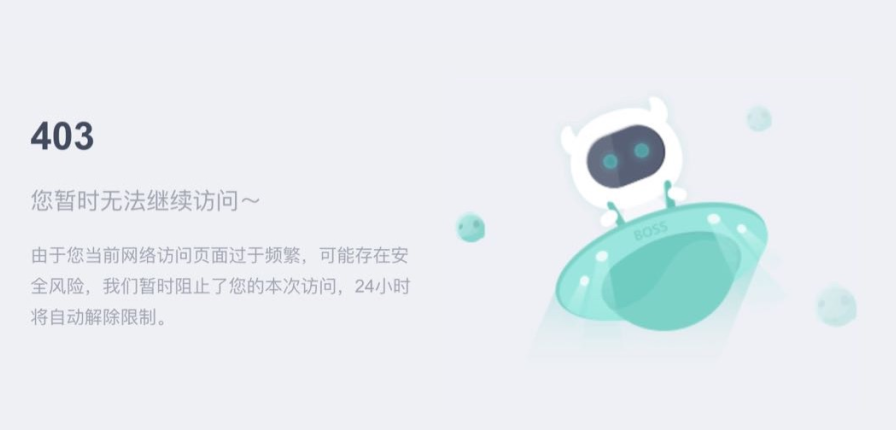

In [10]:
from IPython.display import Image
Image(filename='image4.png')

With regard to verification code, we used manual operators to avoid anti-scraping of website. We can access the verification code manually when the programme is interrupted by this system.  While about the 403 error, we changed our User-agent.

In the Requests library, the user is allowed to customize the request header information, so we change the value of the User-Agent in the request header, so that the server can be spoofed to achieve the purpose of bypassing the anti-crawler. 

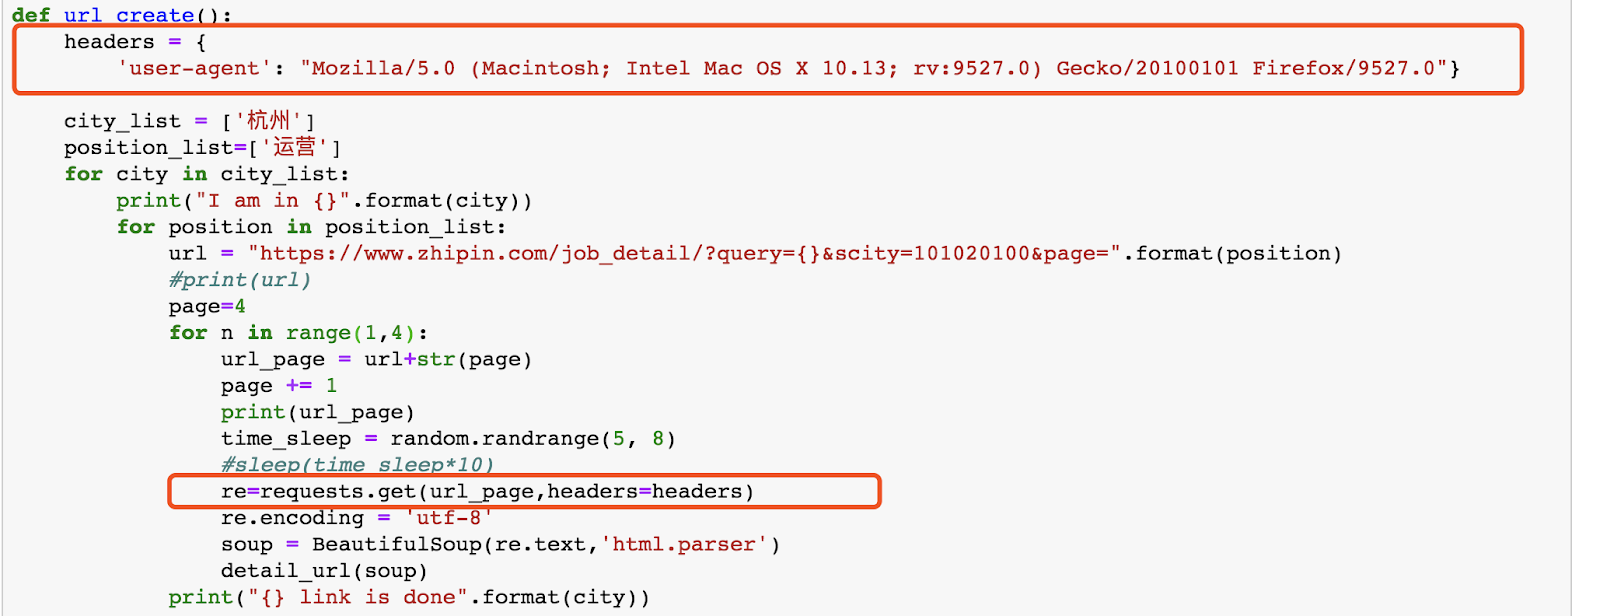

In [11]:
Image(filename='image5.png')

In the whole scraping process, we used several User-agent to fake our request header.

>Mozilla/5.0 (Windows; U; Windows NT 5.1) Gecko/20070309 Firefox/2.0.0.3

>Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36

>Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36

>Mozilla/5.0 (Xll; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.89 Safari/537.36

>Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36

### Data Cleaning

At last, a total of 1227 pieces of raw data are acquired finally and stored in CSV. We import separate csv files into Jupyter notebook and merge them into one data file. 

Raw data are dirty and unuseful. Thus the group should clean the data and transit them into orderly dataset.

In [18]:
import pandas as pd 
import numpy as np

In [19]:
# stretch Jupyter coding blocks to fit screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [20]:
df = pd.read_csv('media_operation_detail_all.csv')
df.head(10)
# if you left it empety, it will read 5 lines, want more ,add number

FileNotFoundError: File b'media_operation_detail_all.csv' does not exist

Firstly describe the dataset to have a integrated look at it.

In [ ]:
df.shape 
# (the number of cases/observations, the number of variables)

In [ ]:
df.info()

In [ ]:
df.columns

1) drop repeated box and internship

We filter the repeated box header and repeated data initially because it will influence the cleaning of pure numeric data(salary). We drop repeated data by judging if there are repeated data of the publishTime, position and companyName.

In [ ]:
# drop repeated box
df.drop(df[df['salary'].str.contains('salary')].index, inplace=True)

In [ ]:
# drop repeated data
df = df.drop_duplicates(subset = ['publishTime','position','companyName'],keep = 'first')

2) Then, we delete the items which are internship jobs, then obtained 1168 pieces of data.

According to our observation,internship jobs recruitment information will clarify the internship situation through the statement of position and responsibility.


In [ ]:
# drop internship
df.drop(df[df['position'].str.contains('实习')].index, inplace=True)
df.drop(df[df['responsibility'].str.contains('实习')].index, inplace=True)

3) divide requirements

Next, we can see that there are three different kinds of information in the requirement column, which includes city, experience and education. So we define a function to split the three items in ‘requirement’ into three separated columns.

As the code shows, we use define a division function which has two arguments, string and index. Firstly, we use ‘: ’ to split the string. Secondly, we use index to help us to output which information we want. For example, we want to divide city in the string. We assigned l[index] to ret, which means that we can get the second element in “l” list. Then if index is not equal to 3(this condition is set for scraping the education level), we use ret[:-2] to get “北京” from “北京经验”.  In this example, we see every word as an element in string. 


In [ ]:
# devide requirements
df_requirement = pd.DataFrame(df['requirement'], columns = ["requirement"])
df_requirement.head()

In [ ]:
# removing the empty values 
df_requirement['requirement']=df_requirement['requirement'].fillna("")

In [ ]:
# lower case 
df_requirement['requirement'] = df_requirement['requirement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_requirement['requirement'].head()

In [ ]:
df_requirement['requirement'].head(30)

In [ ]:
def division(string, index):
    l = string.split('：')
    print(l)
    if len(l) <= index:
        return ''
    ret = l[index]
    if index != 3:
        ret = ret[:-2]
    return ret.strip(' ')

df['requirement_city'] = df['requirement'].map(lambda x: division(x, 1))
df['requirement_exp'] = df['requirement'].map(lambda x: division(x, 2))
df['requirement_edu'] = df['requirement'].map(lambda x: division(x, 3))

4) drop meaningless data

We delete the items whose education requirements and experience are unlimited, which will not show on our data analysis.

In [ ]:
df.drop(df[df['requirement_exp'].str.contains('经验不限')].index, inplace=True)
print(df.describe())
df.drop(df[df['requirement_edu'].str.contains('不限')].index, inplace=True)
print(df.describe())

5) process salaries

As for salary here, we can see that the data in salary column is a range instead of single numeric, which is not suitable for analyzing. So we decide to get mean salary of the range. We use “-” to split this range, replace  “K” with “000”  and change the string to numeric for the convenience of calculation. After that, we calculate the average salary and use map to add ‘avg_salary’ to our data frame.


In [ ]:
# Get mean of salaries
def clear_salary(string):
    salary_list = string.replace("K", "000").split("-")
    salary_list = [int(x) for x in salary_list]
    avg_item = (salary_list[0] + salary_list[1]) / 2
    return avg_item

df['avg_salary'] = df['salary'].map(lambda x: clear_salary(x))

After the four cleaning steps above, we can get a consistent data(screenshot are as follows).

Then we can enter next visualization stage.

In [ ]:
df.head(20)

In [ ]:
df.info()

In [ ]:
print(df.describe())

In [ ]:
sdata = pd.DataFrame (df)
sdata.to_csv ("operation_job_cleaning2.csv", index=False, encoding = "utf-8")

### Data Visualization

We will start from importing consistent data here.There are 885 consistent operator recruitment records here for us to analyze.

#### Q1. Which city will offer highest salary for operators?

The average salary of all four first-tier cities(Beijing, Shanghai, Guangzhou, Shenzhen) is 12,809 yuan, the maximum is 230,000 yuan while the minimum salary of operators is 2,500 yuan.  From the histogram below, the distribution of salary is significantly right skewed. It suits the marketing regulations. Few people can get significantly high salary.


In [ ]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [ ]:
# stretch Jupyter coding blocks to fit screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [ ]:
df = pd.read_csv('operation_job_cleaning2.csv')
df.head(5)

In [ ]:
df.info

In [ ]:
df.describe() 

In [ ]:
BJ = df[df['requirement_city'].str.contains('北京')] 
BJ.describe()

In [ ]:
SH = df[df['requirement_city'].str.contains('上海')] 
SH.describe()

In [ ]:
GZ = df[df['requirement_city'].str.contains('广州')] 
GZ.describe()

In [ ]:
SZ = df[df['requirement_city'].str.contains('深圳')] 
SZ.describe()

In [ ]:
# Adjust the font
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'WeiRuanYaHei-1.ttf'
#plt.rcParams['font.serif'] = 'WeiRuanYaHei-1.ttf'
#fontproperties = font
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下
#matplotlib.get_cachedir()

In [ ]:
# Bar graph to compare average salary in different cities 不同城市的平均薪资对比柱状图
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Users/heweiyuan/py/COM5507/project/WeiRuanYaHei-1.ttf',size=14)
fontproperties = font
df.groupby(u'requirement_city').mean().plot(kind='bar')

The maximum salary is for a operation VP, which reaches 230,000 yean a month.

In [ ]:
#highest
df[df['avg_salary']==230000.000000] 

In [ ]:
#平均薪资分布图
df.avg_salary.plot.hist(bins=50)

From the bar chart, it can be seen that Shanghai will offer the highest average salary for operation talents and Guangzhou will offer the relatively lowest average salary for operators. After combining observation and economic status of these four cities, it is reasonable to display in this way. In Guangzhou, the living consumption and house rent is relatively low compared to other first-tier cities. 


#### Q2. Which kind of operators will be highest in demand?

As we can see on the graph below, product operators are highest in demand. The user operators, content operators, e-commerce operators,sales operators, community operators, sales operators, and data operators are listed in descending order. 


In [ ]:
# Recode the same kind of operations
import sys
pdf = df
pro_pos =[]
for i in pdf['position']:
    if i.__contains__('产品运营'):
        pro_pos.append(True)
    else:
        pro_pos.append(False)
pdf['position'][pro_pos]  = '产品运营'

In [ ]:
pro_user =[]
for i in pdf['position']:
    if i.__contains__('用户运营'):
        pro_user.append(True)
    else:
        pro_user.append(False)
pdf['position'][pro_user]  = '用户运营'

In [ ]:
pro_con =[]
for i in pdf['position']:
    if i.__contains__('内容运营'):
        pro_con.append(True)
    else:
        pro_con.append(False)
pdf['position'][pro_con]  = '内容运营'

In [ ]:
pro_eco =[]
for i in pdf['position']:
    if i.__contains__('速卖通运营'and'天猫运营'):
        pro_eco.append(True)
    else:
        pro_eco.append(False)
pdf['position'][pro_eco]  = '电商运营'

In [ ]:
pos = pdf['position']
data_pos = pos.str.contains('数据运营')
# contians of oxford
pdf['position'] = np.where(data_pos, '数据运营', 
                                      pos.str.replace('-', ' '))

In [ ]:
# Descrbie the number of different kinds of operation 职位数量
pdf.position.value_counts()

In [ ]:
#工作经验分布直方图
#绘制柱状图
def drawBar(poss):
    xticks=['产品运营','用户运营','内容运营','电商运营','社群运营','销售运营','数据运营']
    num_poss = {}
    font = FontProperties(fname="/Users/heweiyuan/Library/Fonts/WeiRuanYaHei-1.ttf",size=10)
    #对每一类成绩进行频数统计
    for pos in poss:
        num_poss[pos] = num_poss.get(pos, 0) + 1
   #创建柱状图
   #第一个参数为柱的横坐标 
   #第二个参数为柱的高度
   #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(7), [num_poss.get(xtick, 0) for xtick in xticks], align='center')
    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(7), xticks,fontproperties=font)
    #设置横坐标的文字说明
    pyplot.xlabel('Position')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Frequency of different kinds of positions')
    #绘图
    pyplot.show()    

poss = pdf.position
drawBar(poss)

#### Q3. How many years of operation working experience are in higher demand? & Is longer operation working experience related to higher salary?

As the graph shows below, most positions need 1 to 3 years’ experience, 3 to 5 years is the following one. Only 3 positions require above 10 years’ working experience, accounting for 0.25% of the dataset. The fresh graduates are the second least-demand, which indicates that the position of operators needs applicants with some working experience. Also, employee with above 5 years’ experience is in low-demand shows that the industry is relatively young, few people persists more than five years.

In [ ]:
#工作经验要求分布
df.requirement_exp.value_counts()

In [ ]:
import matplotlib.font_manager

In [ ]:
#不同经验的平均工资
from matplotlib.font_manager import FontProperties
xticks=['应届生','1年以内','1-3年','3-5年','5-10年','10年以上']
font = FontProperties(fname="/Users/heweiyuan/py/COM5507/project/WeiRuanYaHei-1.ttf", size=10)
fontproperties = font
#df.groupby(u'requirement_exp').mean().plot(kind='bar')
plt.bar(range(6), df['avg_salary'].groupby(df[u'requirement_exp']).mean(),color='blue')
plt.xticks(range(6),xticks,fontproperties=font) ## 可以设置坐标字
plt.xlabel('Experience')
#设置纵坐标的文字说明
plt.ylabel('Average salary')
#设置标题
plt.title('Salary of different working experience')
#绘图

Speaking of working experience, we can see if longer operation working experience means a higher salary. 

From bar chart, We can see that the average of salaries of operators within 3 years is generally below 10000. While operators with over 3 years working experience can try to ask for more than 15000 one month. When operators work in this field over 5 years, they can gain over 20000 per month. The salary can jump greatly in different stages. 

In [ ]:
xticks=['应届生','1年以内','1-3年','3-5年','5-10年','10年以上']
df.boxplot('avg_salary','requirement_exp',rot = 30,figsize=(6,6))
ax.set_xticks(range(6))
ax.set_xticklabels(range(6))
plt.show()

In [ ]:
#工作经验分布直方图
#绘制柱状图
def drawBar(exps):
    xticks=['应届生','1年以内','1-3年','3-5年','5-10年','10年以上']
    num_exps = {}
    font = FontProperties(fname="/Users/heweiyuan/Library/Fonts/WeiRuanYaHei-1.ttf",size=10)
    #对每一类成绩进行频数统计
    for exp in exps:
        num_exps[exp] = num_exps.get(exp, 0) + 1
   #创建柱状图
   #第一个参数为柱的横坐标 
   #第二个参数为柱的高度
   #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(6), [num_exps.get(xtick, 0) for xtick in xticks], align='center')
    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(6), xticks,fontproperties=font)
    #设置横坐标的文字说明
    pyplot.xlabel('Experience')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Experience of job requirement')
    #绘图
    pyplot.show()    

exps = df.requirement_exp
drawBar(exps)

In [ ]:
hdf= df[df['requirement_exp'].str.contains('5-10年'or'10年以上')]
hdf.head(20)

In [ ]:
# Descrbie the number of different kinds of operation 职位数量
hdf.shape

In [ ]:
hdf= hdf[hdf['responsibility'].str.contains('管理' or '总监')]
hdf.shape

In the box plot, there are several discrete numeric values in the “3-5 years” and “5-10 years” variables. We are not pretty sure about the relationship between the experience and salary from the box plot.

After recoding the experience, we use anova to test our assumption.

In [ ]:
#Recode
cleanup_nums = {"requirement_exp":{"1-3年": 2, "3-5年": 3, "经验不限": 88,"1年以内":1, "5-10年":4, "应届生":0, "10年以上":5 },
                "requirement_edu": {"初中及以下": 0, "中专/中技": 1, "高中": 2, "大专": 3,"本科": 4, "硕士": 5, "博士":6, "不限":88 } }

In [ ]:
df["requirement_exp"].value_counts()
df["requirement_edu"].value_counts()

In [ ]:
#df.replace(cleanup_nums, inplace=True)
df.head(10)

In [ ]:
#多因素方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('avg_salary ~ requirement_edu+requirement_exp',df).fit()
anova_results = anova_lm(model)
print(anova_results)

In [ ]:
#effect size of experience
esq_sm_exp = anova_results['sum_sq'][0]/(anova_results['sum_sq'][0]+anova_results['sum_sq'][1])
print(esq_sm_exp)

In [ ]:
#effect sizes of education
esq_sm_edu = anova_results['sum_sq'][0]/(anova_results['sum_sq'][0]+anova_results['sum_sq'][2])
print(esq_sm_edu)

The result showed that there was a significant effect of working experience on the salary at the p<.05 level. 

According to the responsibilities of these positions, we can find that all the position which demand over 5 years refers to the management responsibility. Overall, almost all the operations will transfer to manager to add value for themselves.

#### Q4. Which level of education are most required for operators?

The most welcome academic degree is bachelor’s degree. What comes next is associate degree. The position of operators somewhat needs people who are highly-educated. But bachelor’s degree is enough for this position since master’s degree is not so needed indicated by the bar chart.
The average salary ascends with education degree expect for the associate degree whose average salary is unexpectedly lower than the technical school graduates’.

In [ ]:
#学历要求分布
df.requirement_edu.value_counts()

In [ ]:
#公司类型分布直方图
#绘制柱状图
def drawBar_type(types):
    xticks=['初中及以下','高中','中专/中技','大专','本科','硕士']
    num_exps = {}
    #对每一类成绩进行频数统计
    for edu in edus:
        num_exps[edu] = num_exps.get(edu, 0) + 1
   #创建柱状图
   #第一个参数为柱的横坐标 
   #第二个参数为柱的高度
   #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(6), [num_exps.get(xtick, 0) for xtick in xticks], align='center')
    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(6), xticks)
    #设置横坐标的文字说明
    pyplot.xlabel('Education')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Education frequency of job requirement')
    #绘图
    pyplot.show()

edus = df.requirement_edu
drawBar_edu(edus)

#### Q5.  Of which company types the demand for operations is highest?

Among the 51 types of company, the Internet industry is the largest employer of operator, far more than other company types with a figure of nearly 280 positions of operator are released by Internet company. Electronic commerce, mobile internet, online education, i-finance and software come after.

In [ ]:
#不同companyType的平均工资
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

font = FontProperties(fname="/Users/heweiyuan/Library/Fonts/WeiRuanYaHei-1.ttf",size=10)
fontproperties = font
s_df=df.groupby(u'companyType').mean()
#print(s_df)
ax = s_df.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CompanyType", fontsize=12)
ax.set_ylabel("avg_salary",fontsize=12)
plt.show()

In [ ]:
c_df=df["companyType"].value_counts()
ax = c_df.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CompanyType", fontsize=12)
ax.set_ylabel("amounts", fontsize=12)
plt.show()

The average salary in different type of company differs from one another.

Excluding the outlier, the only one demand in pawn industry, the average salary is relatively high in garment and textile industry, 4S store, consulting company and bank.

#### Q6. Which kind of abilities company want most?

After test the word frequency in the description of responsibility, we find the words USER, EXPERIENCE and PRODUCT are the most frequently occuring words in responsibility. Also, the words ACTIVITY, DATA and ANALYSE appear quite frequently.


In [ ]:
!pip install wordcloud
!pip install jieba

In [ ]:
import pandas as pd
import numpy as np
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import re
matplotlib.style.use('ggplot')
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg

In [ ]:
#df_responsibility = pd.DataFrame(df['responsibility'], columns = ["responsibility"])
#df_responsibility.head(10)
responsibilities = df['responsibility']
print(type(responsibilities))

In [ ]:
action = ''
for kw in df['responsibility']:
      action += kw.strip() + ' '
#print(action)

In [ ]:
action = action.encode("utf8").decode("utf8")
string = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+","",action)
string = re.sub("\d+","",string)
string = re.sub('^(Title|cmp|cmpesc:)(.+):(.*)',"",string)
print(string)

In [ ]:
"""add stop words"""
stopwords = STOPWORDS.copy()
stopwords.add("中文")  #set stopwords 设置停用词，可以继续增加

seg = jieba.cut(string)
seg = ' '.join(seg).split()
######分词后的词都是Unicode格式

words = ''
for word in seg:
    #word = word.encode('utf-8')
    #####因为停用词是utf-8编码的，所以将其也编码为utf-8
    if word not in stopwords:
        words += word.strip() + ' '
#words =words.decode('utf-8')

print(words)

In [ ]:
words = words.split()
word_freq = {}
for word in words: 
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


In [ ]:
#order by frequency of words，transfer dictionary to list
sort_word = []
for word,freq in word_freq.items():
    sort_word.append((word,freq))
sorted_word = sorted(sort_word,key = lambda x:x[1], reverse = True)

##check top 100 frequent words
for word in sorted_word[:100]:
    print(word[0],word[1])

In [ ]:
#select phrase of more than two words 发现一个字的挺多，所以选择长度大于2的词
lengther = []
for word in sorted_word:
    if len(word[0]) > 1 and word[0] !="运营" and word[0] !="能力" and word[0] !="工作" and word[0] !="负责" and word[0] !="公司" and word[0] !="优先" and word[0] !="要求" and word[0] !="相关":
        lengther.append(word)
print(lengther)

In [ ]:
#draw the wordcloud picture
img = Image.open('/Users/heweiyuan/py/COM5507/project/1.png')
img_array = np.array(img) #transfer picture to array 将图片装换为数组
#pig = imread('/Users/heweiyuan/py/COM5507/project/pig.png')
#print(img_array)
img_color = ImageColorGenerator(img_array)
wordcloud1 = WordCloud(font_path = "/Users/heweiyuan/py/COM5507/project/WeiRuanYaHei-1.ttf", mask=img_array, background_color = 'white',max_words = 150,width = 400,height = 400, max_font_size=150,scale=1,stopwords = stopwords).generate_from_frequencies(dict(lengther))
#plt.imshow(wordcloud1)
plt.imshow(wordcloud1.recolor(color_func=img_color))
plt.axis('off')
plt.show()
#plt.to_file(wordcloud.png) 

#### Q7. How many positions demand the ability of data analyzing?  Is the “data” ability really related to higher salary?

From the data shown below, we can see that there are around 24 positions named data operator and there are 507 records mentioned “data” in responsibility of position, which means around 60% of whole operators we scrape are related to data. And the average salary of positions is higher as the relationship with data gets closer ( from requiring data analyzing to data operators).


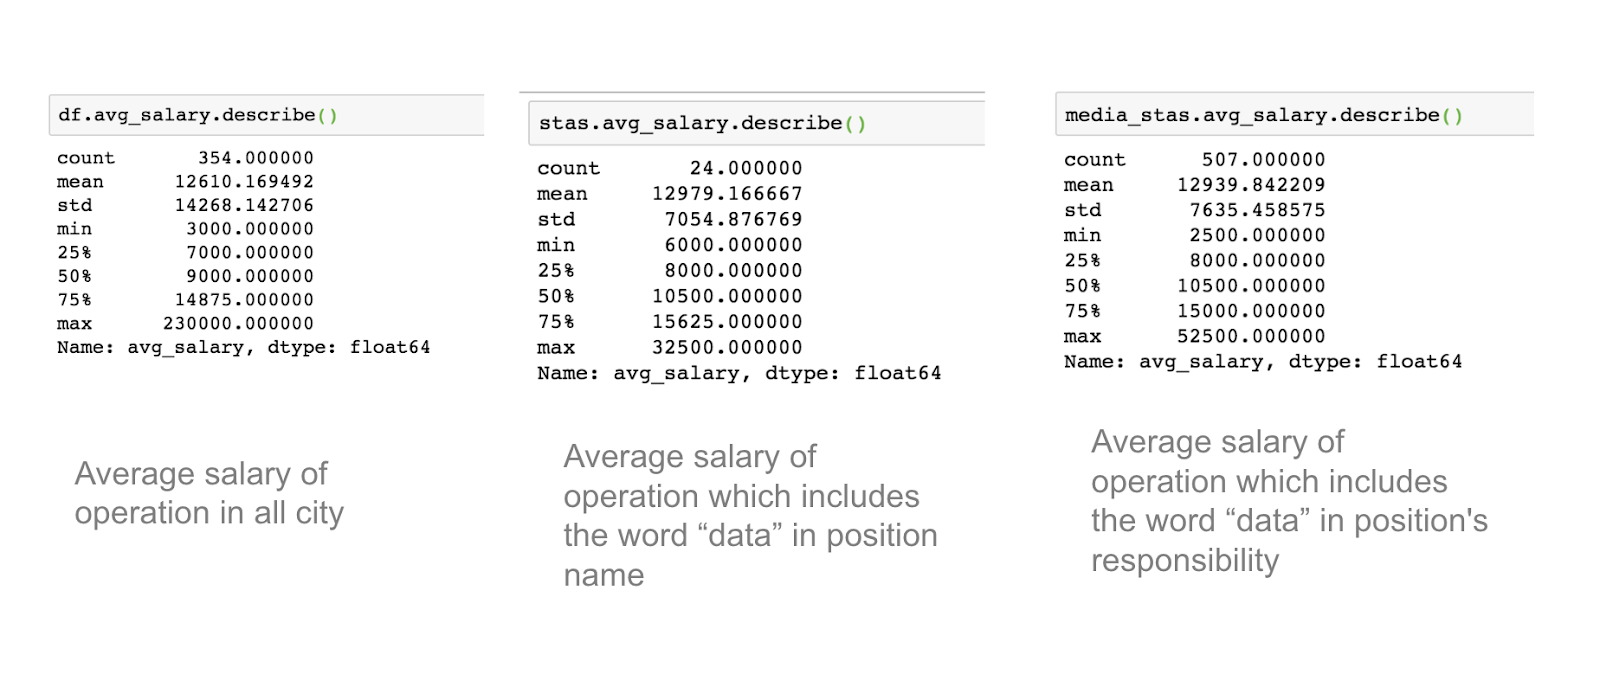

In [13]:
Image(filename='image6.png')

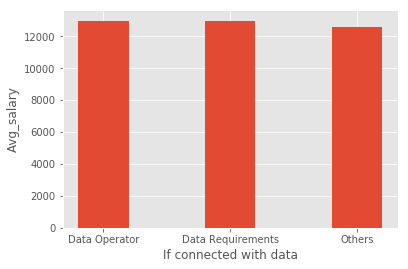

In [14]:
Image(filename='image7.png')

The difference of data operators and operators whose requirements includes data is mainly their responsibilities. The data operators will focus on data processing and analyzing in order to provide support for side of business, most of whom are other operators. The operators whose requirements includes data will emphasis more on their own abilities, for example, user operators will manage the user policy and increase user viscosity. At the same time, they are required to have basic data analysis skill, such as excel and mysql.

#### Q8. Which factors will affect the average salary most significantly?

We define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the variable in explaining the salary.

From the graph, we can see that position turned out to be the most important factor followed by working experience, education level, responsibility and working city. 


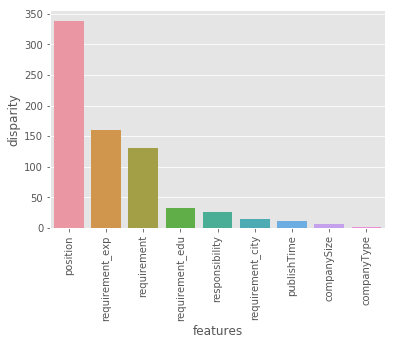

In [15]:
Image(filename='image8.png')

### Conclusion

Viewing the result above, we can find some interesting relation between Internet and operators. For the name of the positions, there are product operator, user operator and community operator, which are closely related with Internet. Also, there are Tianmao operator, Amazon operator and e-business operator, which are totally relied on the Internet. In turns of the industry, apart from the Internet industry, which rank first in the amount of position, there are many other industries related with Internet such as E-business, Internet finance, online education, social network, and so on.

As a position to maintain the daily content, activities and so on, it is actually grow as the Internet industry grow. In traditional industry, like manufacturing and commerce, content and activity are not the core value of the industry. However, the information technology brought new chances and needs, leading to the development of operator position. 


From the data we collected, we find some similarity of the position and the Internet industry. For instance, the Internet industry is comparatively young, and working experience requirement of operator is quite short as the largest part is 1-3 year experience. Operator is a position requires comprehensive ability and especially the ability to absorb new knowledge and acquire new skills for it need the continuous catching up with their product, users and social environment. 

The ability of learning and adoption is more important than long experience and high education degree. Similar to other job, the salary of operator is positively correlated with education degree and working experience, while there are not large amount of position requiring high education level(master or higher) and long-time working experience(more than 5 years). 

What’s more, as the usage of big data come to the stage, it goes further with the help of data analysis. The operator positions requires the ability of data analysis and even some of their name is data operators.

Since big data is increasingly important in this age, the ability to use it in operators is very useful. Among the positions, the more closely related with data analysis, the higher the salary is.


For people who head to this job. We have some suggestions. Firstly, to be a good operator, one have better to master the skills of data analysis and data management. As many of the company do not clearly understand the value and application of big data, usually there is not clear Instruction for operator to manage the data. With the skill, operator can make better use of the data and accumulate this resource. Besides, for undergraduate student, to get a operator job, working experience is more important than higher education degree. 

As most of the companies require at least one year working experience, applicants with relative internship are more competitive. Last but not least, to be an operator, applicant have better to plan the working career earlier and be ready for transformation. As this position usually require less specific skill and experience while repeat the same contents, operator might apply their accumulation in some more challenging job such as product manager.  


### Implication

For the further study on some related topics, it  can provoke to explore more about the challenge and opportunity in an era of big data. We can crawl more data to show the whole marketing situations not only from one position. And also we can compare different responsibilities of different positions to clarify what kind of talent will be more competitive and popular in today’s world.

For the job seeker who wants to engage in the position of operators and obtain high salary, this report would be a reference for him/her to select related jobs and prepare the required skills and other factor needed in advanced. For example, they would better equip themselves with data processing knowledge and skills since they are faced with the challenge of big data. 

For our future study, the process of finishing this report will play a role of enlightenment. It improve our capability of coding, the skills of searching, and most importantly, change our way of thinking. Besides, although we spend a lot of time and make enormous efforts in python crawler, there are something imperfect when presenting the result. We should have connected each separated result together. So this would be a point to carefully think about when we or other data learners want to do some similar scraping —— to consider how to tell a story before data acquisition. In this way, data can serve the theme better. 


## Finally Xiao Zhang and Xiao He made up their mind to study data acquisition and analyzing HARDLY and try to seek a job as data operator after graduation.